# Introduction

This code can answer the following questions:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. 

<img src="assets/bricks.jpg">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [9]:
df=pd.read_csv('data/colors.csv')
print(df.head())
print(df.tail())
df.shape

   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
       id                          name     rgb is_trans
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f


(135, 4)

In [13]:
df.nunique(axis=0)

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [14]:
count_t=0
count_f=0
for i in df['is_trans']:
    if i=="t":
        count_t+=1
    else:
        count_f+=1
print(count_t)
print(count_f)

28
107


<h3>Understanding LEGO Themes vs. LEGO Sets<h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="assets/lego_themes.png">


A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="assets/lego_sets.png">


The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

 

In [15]:
sets_df=pd.read_csv("data/sets.csv")

In [16]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [17]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [25]:
sort_set_df=sets_df.sort_values('year')
print(sort_set_df)

       set_num                               name  year  theme_id  num_parts
9521   700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534   700.2-1               Large Gift Set (ABB)  1949       365        178
9539   700.3-1              Medium Gift Set (ABB)  1949       365        142
9544   700.A-1              Small Brick Set (ABB)  1949       371         24
9545   700.B-1  Small Doors and Windows Set (ABB)  1949       371         12
...        ...                                ...   ...       ...        ...
11289  75290-1                 Mos Eisley Cantina  2020       158          0
5147   41430-1              Summer Fun Water Park  2020       494       1012
11337  75550-1             Minions Kung Fu Battle  2021       689          0
11335  75547-1           Minion Pilot in Training  2021       689          0
11334  75546-1               Minions in Gru’s Lab  2021       689          0

[15710 rows x 5 columns]


In [28]:
group_by_name=sort_set_df.groupby('name').count()
print(sort_by_name)
sort_set_df.groupby('year').count()

                           set_num  year  theme_id  num_parts
name                                                         
 Spectre                         1     1         1          1
'Where Are My Pants?' Guy        1     1         1          1
(Me and My) Birthday             1     1         1          1
(Patty's) Pony Stable            1     1         1          1
1 stud Blue Storage Brick        1     1         1          1
...                            ...   ...       ...        ...
{Aeroplane}                      1     1         1          1
{Basic Promotional Set}          6     6         6          6
{Ducks}                          1     1         1          1
{Red Race Car Number 3}          1     1         1          1
{Roadplates and Scenery}         1     1         1          1

[13437 rows x 4 columns]


,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [29]:
sort_num_parts=sets_df.sort_values('num_parts',ascending=False)
print(sort_num_parts.head())

        set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922


In [31]:
sort_by_year=sort_set_df.groupby('year').count()
print(sort_by_year)

      set_num  name  theme_id  num_parts
year                                    
1949        5     5         5          5
1950        6     6         6          6
1953        4     4         4          4
1954       14    14        14         14
1955       28    28        28         28
...       ...   ...       ...        ...
2017      786   786       786        786
2018      816   816       816        816
2019      840   840       840        840
2020      674   674       674        674
2021        3     3         3          3

[71 rows x 4 columns]


In [40]:
print(sets_df[sets_df['year']==1955].count())
sets_df[sets_df['year']==2019].count()

set_num      28
name         28
year         28
theme_id     28
num_parts    28
dtype: int64


set_num      840
name         840
year         840
theme_id     840
num_parts    840
dtype: int64

In [41]:
sort_by_year['set_num'].head()


year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

C:\Users\ybxu\AppData\Local\Temp\ipykernel_10996\4255842710.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(sort_by_year.index[:-2], sort_by_year['set_num'][:-2])


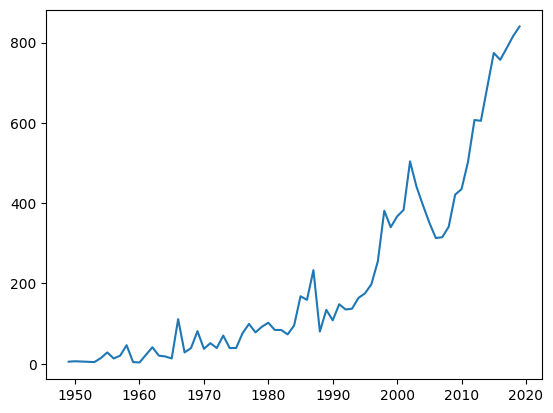

In [48]:

plt.plot(sort_by_year.index[:-2], sort_by_year['set_num'][:-2])


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [49]:
themes_by_year=sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})

In [52]:
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)
print(themes_by_year.head())
themes_by_year.tail()

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4


,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


C:\Users\ybxu\AppData\Local\Temp\ipykernel_10996\220444057.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2])


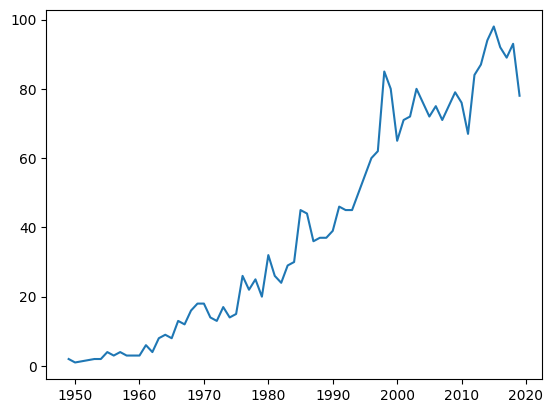

In [53]:
plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2])

### Line Charts with Two Seperate Axes

C:\Users\ybxu\AppData\Local\Temp\ipykernel_10996\663800282.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.plot(sort_by_year.index[:-2], sort_by_year['set_num'][:-2], color='green')
C:\Users\ybxu\AppData\Local\Temp\ipykernel_10996\663800282.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax2.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], color='blue')


Text(0, 0.5, 'Number of themes')

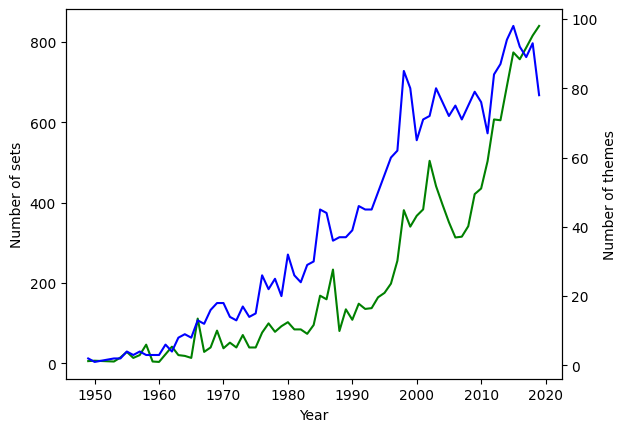

In [59]:
ax1=plt.gca()
ax2=ax1.twinx()
ax1.plot(sort_by_year.index[:-2], sort_by_year['set_num'][:-2], color='green')
ax2.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets')
ax2.set_ylabel('Number of themes')

In [60]:
parts_per_set=sets_df.groupby('year').agg({'num_parts': pd.Series.mean})

In [65]:
print(parts_per_set)

       num_parts
year            
1949   99.600000
1950    1.000000
1953   13.500000
1954   12.357143
1955   36.607143
...          ...
2017  221.840967
2018  213.618873
2019  207.510714
2020  259.732938
2021    0.000000

[71 rows x 1 columns]


### Scatter Plots in Matplotlib

C:\Users\ybxu\AppData\Local\Temp\ipykernel_10996\3738618013.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(parts_per_set.index[:-2], parts_per_set['num_parts'][:-2])


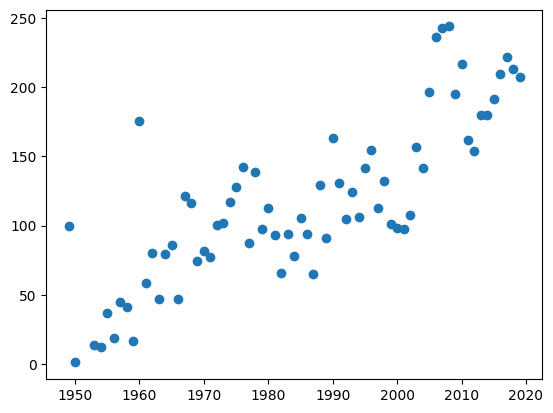

In [70]:
plt.scatter(parts_per_set.index[:-2], parts_per_set['num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [71]:
set_theme_count=sets_df['theme_id'].value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

In [74]:
themes_df=pd.read_csv('data/themes.csv')
print(themes_df.head())
themes_df.shape

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0


(596, 3)

In [92]:
themes_df[themes_df.name=='Star Wars']


,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [94]:
sets_df[sets_df.theme_id==18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [96]:
sets_df[sets_df.theme_id==209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [97]:
sets_df[sets_df.theme_id==158]


,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Merging (i.e., Combining) DataFrames based on a Key


In [98]:
set_theme_count=pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [101]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

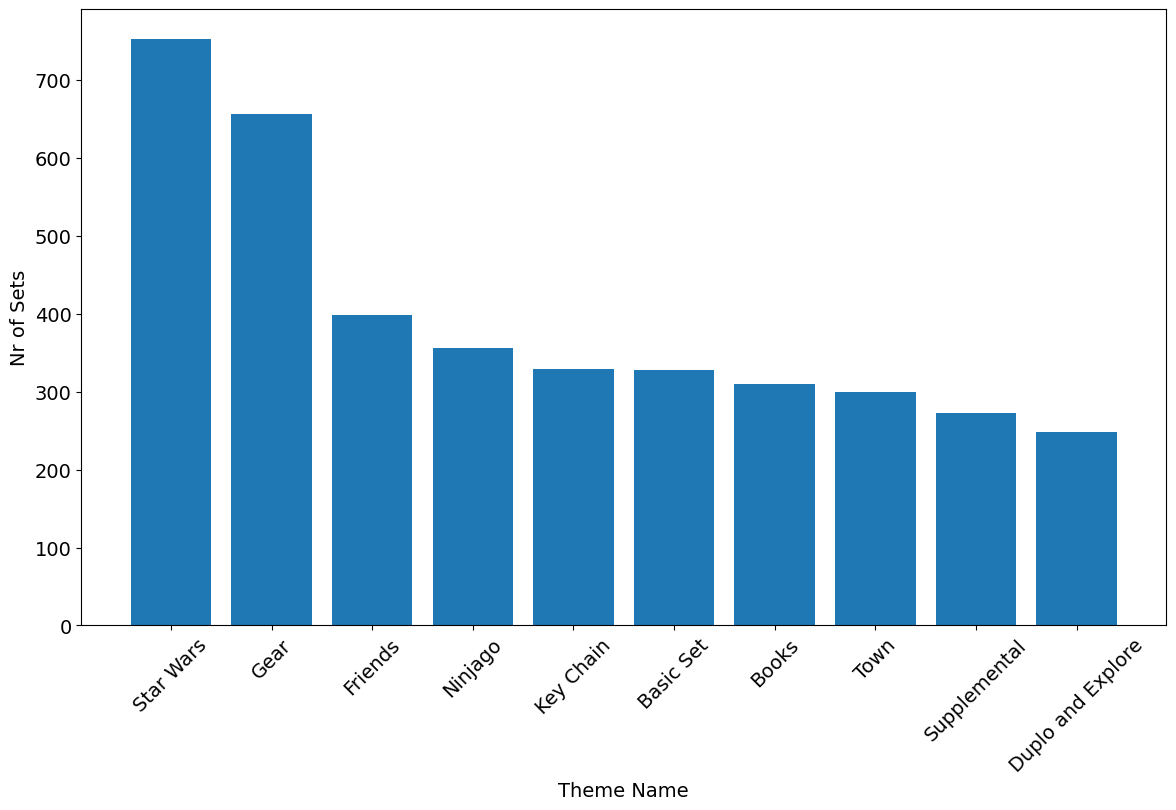

In [103]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.bar(merged_df.name[:10],merged_df.set_count[:10])